In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Get the dataset and prepare it for analysis and model

#### Set the index to date

In [2]:
df = pd.read_csv('USD_INR.csv')
df['Date'] = pd.to_datetime(df["Date"])
df_idx = df.set_index(["Date"], drop=True)
df_idx.head(5)

,Price,Open,High,Low,Change %
Date,,,,,
2017-08-10,64.165,63.898,64.175,63.855,0.48
2017-08-09,63.860,63.780,63.860,63.710,0.26
2017-08-08,63.692,63.750,63.785,63.615,-0.23
2017-08-07,63.840,63.710,63.865,63.648,0.26
2017-08-04,63.675,63.670,63.786,63.572,-0.05


#### Flip the dataframe

In [3]:
df_idx = df_idx.sort_index(axis=1, ascending=True)
df_idx = df_idx.iloc[::-1]
df_idx.head(5)

,Change %,High,Low,Open,Price
Date,,,,,
1980-01-02,0.00,8.00,8.00,8.00,8.00
1980-01-03,-0.63,7.95,7.95,7.95,7.95
1980-01-04,1.26,8.05,8.05,8.05,8.05
1980-01-07,0.00,8.05,8.05,8.05,8.05
1980-01-08,0.00,8.05,8.05,8.05,8.05


#### Plot the data

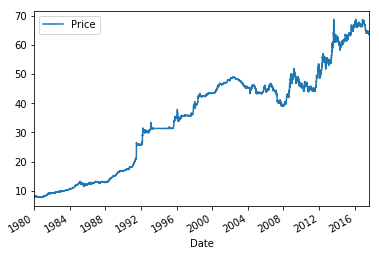

In [4]:
data = df_idx[['Price']]
data.plot(y='Price')

In [5]:
#counting number of days from 1982 t0 present
diff = data.index.values[-1] - data.index.values[0]
days = diff.astype('timedelta64[D]')
#print(days)
days = days / np.timedelta64(1, 'D')
#print(days)
years = int(days/365)
print("Total data: %d years"%years)
print("80 percent data = 1980 to %d"%(1980 + int(0.8*years)))

Total data: 37 years
80 percent data = 1980 to 2009


#### Create training and testing data

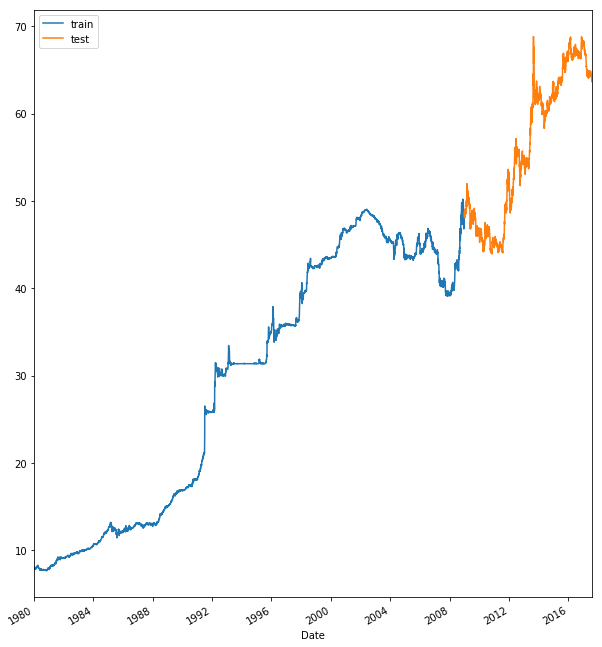

In [6]:
split_date = pd.Timestamp('01-01-2009')

train = data.loc[:split_date]
test = data.loc[split_date:]

ax = train.plot(figsize=(10,12))
test.plot(ax=ax)
plt.legend(['train', 'test'])
plt.show()

#### Normalize the dataset

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)
print(train_sc.shape)

(7452, 1)


In [8]:
train_sc_df = pd.DataFrame(train_sc, columns=['Y'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Y'], index=test.index)

for s in range(1,2):#range 1,2 means iterate only once till 1 not including 2
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s) #pushed 1 cell down
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)
print(train_sc_df.head(5))
X_train = train_sc_df.dropna().drop('Y', axis=1) #dropping NAN
print(X_train.head(5))
y_train = train_sc_df.dropna().drop('X_1', axis=1)
print(y_train.head(5))
X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

X_train = X_train.as_matrix()
y_train = y_train.as_matrix()
X_test = X_test.as_matrix()
y_test = y_test.as_matrix()

                   Y       X_1
Date                          
1980-01-02  0.007526       NaN
1980-01-03  0.006350  0.007526
1980-01-04  0.008702  0.006350
1980-01-07  0.008702  0.008702
1980-01-08  0.008702  0.008702
                 X_1
Date                
1980-01-03  0.007526
1980-01-04  0.006350
1980-01-07  0.008702
1980-01-08  0.008702
1980-01-09  0.008702
                   Y
Date                
1980-01-03  0.006350
1980-01-04  0.008702
1980-01-07  0.008702
1980-01-08  0.008702
1980-01-09  0.007526


C:\Users\putta.reddy\AppData\Local\Continuum\anaconda3\anaconda_new\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
C:\Users\putta.reddy\AppData\Local\Continuum\anaconda3\anaconda_new\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()
C:\Users\putta.reddy\AppData\Local\Continuum\anaconda3\anaconda_new\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\putta.reddy\AppData\Local\Continuum\anaconda3\anaconda_new\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [9]:
print('Train size: (%d x %d)'%(X_train.shape[0], X_train.shape[1]))
print('Test size: (%d x %d)'%(X_test.shape[0], X_test.shape[1]))

Train size: (7451 x 1)
Test size: (2245 x 1)


## Setup baseline model of SVM Regressor

In [10]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')

In [11]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

C:\Users\putta.reddy\AppData\Local\Continuum\anaconda3\anaconda_new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\putta.reddy\AppData\Local\Continuum\anaconda3\anaconda_new\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


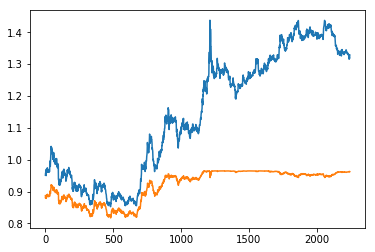

In [12]:
plt.plot(y_test)
plt.plot(y_pred)

In [13]:
from sklearn.metrics import r2_score

def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

r2_test = r2_score(y_test, y_pred)
print("R-squared is: %f"%r2_test)

R-squared is: -0.963381


## Build a Neural Network

In [14]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K

C:\Users\putta.reddy\AppData\Local\Continuum\anaconda3\anaconda_new\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


### 1 hidden layer with 1 neuron

In [15]:
K.clear_session()
model = Sequential()
model.add(Dense(1, input_shape=(X_test.shape[1],), activation='tanh', kernel_initializer='lecun_uniform'))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
7451/7451 [==============================] - 0s 57us/step - loss: 1.1167
Epoch 2/20
7451/7451 [==============================] - 0s 45us/step - loss: 0.3893
Epoch 3/20
7451/7451 [==============================] - 0s 49us/step - loss: 0.2039
Epoch 4/20
7451/7451 [==============================] - 0s 49us/step - loss: 0.1671
Epoch 5/20
7451/7451 [==============================] - 0s 35us/step - loss: 0.1427
Epoch 6/20
7451/7451 [==============================] - 0s 36us/step - loss: 0.1147
Epoch 7/20
7451/7451 [==============================] - 0s 62us/step - loss: 0.0839
Epoch 8/20
7451/7451 [==============================] - 0s 47us/step - loss: 0.0554
Epoch 9/20
7451/7451 [==============================] - 0s 61us/step - loss: 0.0334
Epoch 10/20
7451/7451 [==============================] - 0s 49us/step - loss: 0.0189
Epoch 11/20
7451/7451 [==============================] - 0s 57us/step - loss: 0.0104
Epoch 12/20
7451/7451 [==============================] - 0s 40us/step - lo

R-Squared: -1.145840


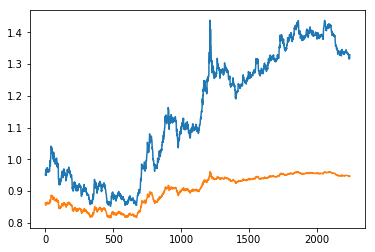

In [16]:
y_pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(y_pred)
print('R-Squared: %f'%(r2_score(y_test, y_pred)))

#### 2 Hidden Layers with 50 neurons each and ReLU activation function

In [17]:
K.clear_session()
model = Sequential()
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
7451/7451 [==============================] - 0s 61us/step - loss: 0.0083
Epoch 2/20
7451/7451 [==============================] - 0s 42us/step - loss: 1.3015e-05
Epoch 3/20
7451/7451 [==============================] - 0s 43us/step - loss: 1.0256e-05
Epoch 4/20
7451/7451 [==============================] - 0s 44us/step - loss: 9.5924e-06
Epoch 5/20
7451/7451 [==============================] - 0s 41us/step - loss: 1.0054e-05
Epoch 6/20
7451/7451 [==============================] - 0s 40us/step - loss: 1.0099e-05
Epoch 7/20
7451/7451 [==============================] - 0s 40us/step - loss: 1.1729e-05
Epoch 8/20
7451/7451 [==============================] - 0s 41us/step - loss: 1.0741e-05
Epoch 9/20
7451/7451 [==============================] - 0s 42us/step - loss: 1.2831e-05
Epoch 10/20
7451/7451 [==============================] - 0s 63us/step - loss: 1.1775e-05
Epoch 11/20
7451/7451 [==============================] - 1s 89us/step - loss: 1.5299e-05
Epoch 12/20
7451/7451 [===========

R-Squared: 0.998716


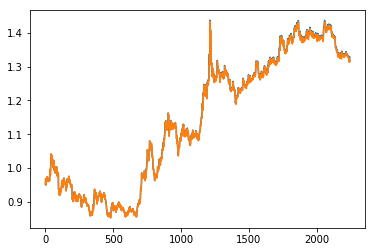

In [18]:
y_pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(y_pred)
print('R-Squared: %f'%(r2_score(y_test, y_pred)))

## Try to predict the difference between consecutive days
### This is also known as introducing stationarity in the dataset.
### A better test of the model is to predict stationarized data where the mean, standard deviation, autocorrelation are constant over time.
### Because stock price data, currency exchange etc. are generated using a completely stochastic random walk process. Being able to predict future outcomes of a stochastic process is by definition not possible, and if someone claims to do this, one should be a bit skeptical [Vegard Flovik, PhD]